In [1]:
# Časť 1: Data Preprocessing

# Importovanie knižníc
import numpy             as np   # NumPy je knižnica Pythonu používaná na prácu s poľami
import matplotlib.pyplot as plt  # Matplotlib je knižnica vizualizácie a grafického vykresľovania údajov pre Python, pyplot sa používa na vykreslenie 2D grafiky 
import pandas            as pd   # Pandas je knižnica Pythonu používaná na manipuláciu a analýzu údajov

In [2]:
# Importovanie training datasetu
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')   # Načítanie Training datasetu
training_set  = dataset_train.iloc[:, 1:2].values             # Pridelenie setu - všetky row, columns od 1 do 2

In [3]:
dataset_train.head()     # Kontrola výpísania dáť zo súboru 'Google_Stock_Price_Train.csv' (prvých 5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# Škálovanie setu
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1)) 
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Vytvorenie dátovej štruktúry s 60 časovými krokmi a s 1 výstupom 
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping - zmena tvaru poľa, bez zmeny údajov
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Časť 2: Budovanie RNN

# RNN (Recurrent Neural Network/Rekurentná Neurónová Sieť): umožňuje modelovať pamäťové jednotky tak, aby pretrvávali údaje a modelovali krátkodobé závislosti. Používa sa tiež pri predpovedi časových radov na identifikáciu korelácií a vzorov údajov.

# Importovanie Keras knižníc a balíkov
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Inicializácia RNN
regressor = Sequential()

# Pridanie prvej vrstvy LSTM a regularizácia Dropout
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Pridanie druhej vrstvy LSTM a regularizácia Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Pridanie tretej vrstvy LSTM a regularizácia Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Pridanie štvrtej vrstvy LSTM a regularizácia Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Pridanie výstupnej vrstvy
regressor.add(Dense(units = 1))

# Kompilácia RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [9]:
# Prispôsobenie (fit) RNN k Training setu
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 78ms/step - loss: 0.1161
Epoch 2/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0080
Epoch 3/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0057: 1
Epoch 5/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0042
Epoch 13/100
38/38 [=

38/38 [==============================] - 3s 84ms/step - loss: 0.0013


In [10]:
# Časť 3: Tvorba predpovedí a vizualizácia výsledkov

# Importovanie test datasetu
dataset_test     = pd.read_csv('Google_Stock_Price_Test.csv')   # Načítanie test datasetu - skutočná cena akcii z roku 2017
real_stock_price = dataset_test.iloc[:, 1:2].values             # Pridelenie skutočných hodnôt - všetky row, columns od 1 do 2

In [11]:
dataset_test.head()     # Kontrola výpísania dáť zo súboru 'Google_Stock_Price_Test.csv' (prvých 5)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [12]:
# Získanie predpokladanej ceny akcií z roku 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

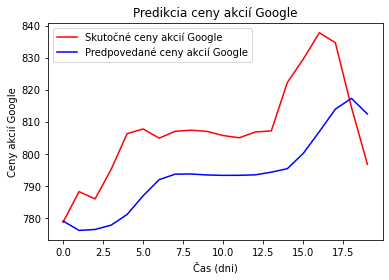

In [13]:
# Vizualizácia výsledkov
plt.plot(real_stock_price,      color = 'red' , label = 'Skutočné ceny akcií Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predpovedané ceny akcií Google')
plt.title('Predikcia ceny akcií Google')
plt.xlabel('Čas (dni)')
plt.ylabel('Ceny akcií Google')
plt.legend()
plt.show()

In [14]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [15]:
print(predicted_stock_price)

[[779.21796]
 [776.2798 ]
 [776.57513]
 [777.9188 ]
 [781.2512 ]
 [787.06177]
 [792.08435]
 [793.78986]
 [793.8455 ]
 [793.5339 ]
 [793.41943]
 [793.4312 ]
 [793.57806]
 [794.4059 ]
 [795.50104]
 [800.27814]
 [807.03906]
 [814.03955]
 [817.3874 ]
 [812.5217 ]]
